In [9]:
%%capture
!pip install wordcloud
!pip install pandas-profiling
!pip install transformers
!pip install torch torchvision torchaudio
import json
import regex
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
import string
import re



In [10]:
#merge the Revolut bank reviews
rev_apple = pd.read_csv("https://raw.githubusercontent.com/HaoEarm/DSA3101_Project/main/Data/Revolut_apple.csv")
rev_play = pd.read_csv("https://raw.githubusercontent.com/HaoEarm/DSA3101_Project/main/Data/revolut_play_df.csv")
rev_all = pd.concat([rev_apple, rev_play], ignore_index= True)
rev_all = rev_all.drop(columns=['Unnamed: 0'])
rev_all['No.'] = rev_all.reset_index().index
rev_all

,UserName,Review,Score,Date,Bank,No.
0,steveawsum,"I signed up, completed identity verification a...",1,2024-03-08 05:51:31,Revolut,0
1,AlvaroAW,While the rest of the banks make it more diffi...,5,2024-03-08 02:33:09,Revolut,1
2,channa_e,I was subscribed to metal and I wanted to clos...,1,2024-03-03 15:05:39,Revolut,2
3,DavidChing,Had issue signing up twice. Go back to YouTrip,1,2024-03-03 13:18:10,Revolut,3
4,Perry-the-Platypus,What a joke of an app that tries to help excha...,1,2024-03-01 10:06:53,Revolut,4
...,...,...,...,...,...,...
669,Tony Milroy,"Terrible, just get to document upload process ...",1,2024-03-22 18:44:36,Revolut,669
670,Mary O Hare,Happy with service,4,2024-03-22 18:42:50,Revolut,670
671,Kenneth Eagling,I would refer you to Dr. RANCOURT who showed i...,5,2024-03-22 18:41:42,Revolut,671
672,Volante Stephen Sarpong,Unbelievable,5,2024-03-22 18:41:08,Revolut,672


In [11]:
nltk.download('punkt')
nltk.download('stopwords')
#lowercase
rev_all['Review']= rev_all['Review'].apply(lambda x: x.lower())
#tokenise
#rev_all['Review'] = rev_all['Review'].apply(nltk.word_tokenize)
#rev_all
#removing stop words
#stop_words = set(stopwords.words('english'))
#rev_all['Review'] = rev_all['Review'].apply(lambda x: [word for word in x if word not in stop_words])
rev_all

,UserName,Review,Score,Date,Bank,No.
0,steveawsum,"i signed up, completed identity verification a...",1,2024-03-08 05:51:31,Revolut,0
1,AlvaroAW,while the rest of the banks make it more diffi...,5,2024-03-08 02:33:09,Revolut,1
2,channa_e,i was subscribed to metal and i wanted to clos...,1,2024-03-03 15:05:39,Revolut,2
3,DavidChing,had issue signing up twice. go back to youtrip,1,2024-03-03 13:18:10,Revolut,3
4,Perry-the-Platypus,what a joke of an app that tries to help excha...,1,2024-03-01 10:06:53,Revolut,4
...,...,...,...,...,...,...
669,Tony Milroy,"terrible, just get to document upload process ...",1,2024-03-22 18:44:36,Revolut,669
670,Mary O Hare,happy with service,4,2024-03-22 18:42:50,Revolut,670
671,Kenneth Eagling,i would refer you to dr. rancourt who showed i...,5,2024-03-22 18:41:42,Revolut,671
672,Volante Stephen Sarpong,unbelievable,5,2024-03-22 18:41:08,Revolut,672


In [12]:
#Calculating Sentiment Score
def senti_sc(x):
    if x is not None:
       return TextBlob(x).sentiment

rev_all["Sentiment_score"]= rev_all["Review"].apply(senti_sc)
rev_all

,UserName,Review,Score,Date,Bank,No.,Sentiment_score
0,steveawsum,"i signed up, completed identity verification a...",1,2024-03-08 05:51:31,Revolut,0,"(0.075, 0.5125)"
1,AlvaroAW,while the rest of the banks make it more diffi...,5,2024-03-08 02:33:09,Revolut,1,"(0.0, 0.75)"
2,channa_e,i was subscribed to metal and i wanted to clos...,1,2024-03-03 15:05:39,Revolut,2,"(0.03333333333333335, 0.7166666666666667)"
3,DavidChing,had issue signing up twice. go back to youtrip,1,2024-03-03 13:18:10,Revolut,3,"(0.0, 0.0)"
4,Perry-the-Platypus,what a joke of an app that tries to help excha...,1,2024-03-01 10:06:53,Revolut,4,"(-0.3, 0.7)"
...,...,...,...,...,...,...,...
669,Tony Milroy,"terrible, just get to document upload process ...",1,2024-03-22 18:44:36,Revolut,669,"(-0.75, 0.95)"
670,Mary O Hare,happy with service,4,2024-03-22 18:42:50,Revolut,670,"(0.8, 1.0)"
671,Kenneth Eagling,i would refer you to dr. rancourt who showed i...,5,2024-03-22 18:41:42,Revolut,671,"(0.1, 0.6)"
672,Volante Stephen Sarpong,unbelievable,5,2024-03-22 18:41:08,Revolut,672,"(-0.25, 1.0)"


In [13]:
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity
  
#Create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

rev_all['Subjectivity'] = rev_all['Review'].apply(getSubjectivity)
rev_all['Polarity'] = rev_all['Review'].apply(getPolarity)
rev_all

,UserName,Review,Score,Date,Bank,No.,Sentiment_score,Subjectivity,Polarity
0,steveawsum,"i signed up, completed identity verification a...",1,2024-03-08 05:51:31,Revolut,0,"(0.075, 0.5125)",0.512500,0.075000
1,AlvaroAW,while the rest of the banks make it more diffi...,5,2024-03-08 02:33:09,Revolut,1,"(0.0, 0.75)",0.750000,0.000000
2,channa_e,i was subscribed to metal and i wanted to clos...,1,2024-03-03 15:05:39,Revolut,2,"(0.03333333333333335, 0.7166666666666667)",0.716667,0.033333
3,DavidChing,had issue signing up twice. go back to youtrip,1,2024-03-03 13:18:10,Revolut,3,"(0.0, 0.0)",0.000000,0.000000
4,Perry-the-Platypus,what a joke of an app that tries to help excha...,1,2024-03-01 10:06:53,Revolut,4,"(-0.3, 0.7)",0.700000,-0.300000
...,...,...,...,...,...,...,...,...,...
669,Tony Milroy,"terrible, just get to document upload process ...",1,2024-03-22 18:44:36,Revolut,669,"(-0.75, 0.95)",0.950000,-0.750000
670,Mary O Hare,happy with service,4,2024-03-22 18:42:50,Revolut,670,"(0.8, 1.0)",1.000000,0.800000
671,Kenneth Eagling,i would refer you to dr. rancourt who showed i...,5,2024-03-22 18:41:42,Revolut,671,"(0.1, 0.6)",0.600000,0.100000
672,Volante Stephen Sarpong,unbelievable,5,2024-03-22 18:41:08,Revolut,672,"(-0.25, 1.0)",1.000000,-0.250000


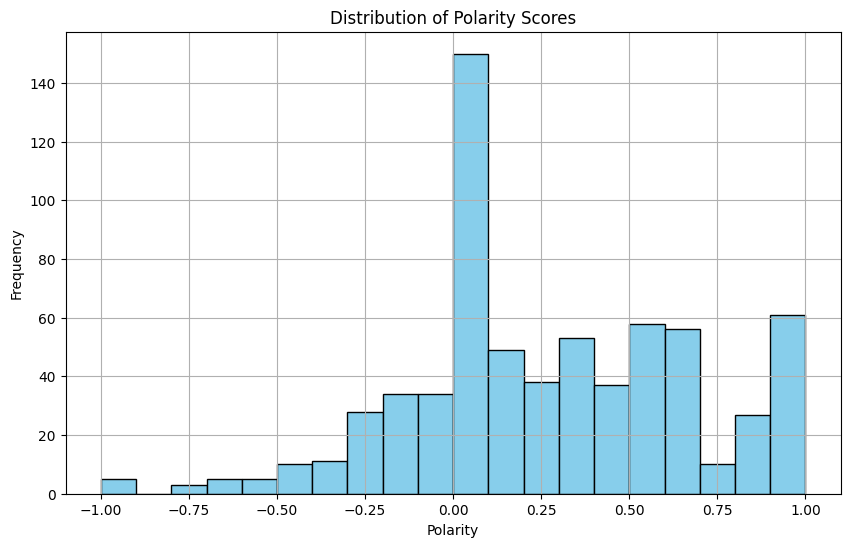

In [14]:
import matplotlib.pyplot as plt

# Assuming 'rev_all' is your DataFrame and 'Polarity' is the column containing polarity scores

# Plot histogram of polarity scores
plt.figure(figsize=(10, 6))
plt.hist(rev_all['Polarity'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Polarity Scores')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



In [19]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
import torch
from transformers import RobertaForSequenceClassification
from tqdm.notebook import tqdm

from transformers import pipeline
#https://huggingface.co/lxyuan/distilbert-base-multilingual-cased-sentiments-student

distilled_student_sentiment_classifier = pipeline(model="lxyuan/distilbert-base-multilingual-cased-sentiments-student",top_k=None)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\spooj\AppData\Local\Programs\Python\Python39\lib\site-packages\transformers\utils\import_utils.py", line 1472, in _get_module
    return importlib.import_module("." + module_name, self.__name__)
  File "c:\Users\spooj\AppData\Local\Programs\Python\Python39\lib\importlib\__init__.py", line 127, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
  File "<frozen importlib._bootstrap>", line 1030, in _gcd_import
  File "<frozen importlib._bootstrap>", line 1007, in _find_and_load
  File "<frozen importlib._bootstrap>", line 986, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 680, in _load_unlocked
  File "<frozen importlib._bootstrap_external>", line 850, in exec_module
  File "<frozen importlib._bootstrap>", line 228, in _call_with_frames_removed
  File "c:\Users\spooj\AppData\Local\Programs\Python\Python39\lib\site-packages\transformers\pipelines\__init__.py", line 26, in <module>
 